# Part 1

In [0]:
%tensorflow_version 2.x

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [96]:

train = pd.read_csv("housing_train.csv")
test = pd.read_csv("housing_test.csv")

all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
all_data.head()
#all_data.size 
all_data.shape[1]

79

In [0]:
#log transform the target y in training data - by reference inside all
train["SalePrice"] = np.log1p(train["SalePrice"])

In [0]:
learning_rates= [0.5,0.1,0.05 ,.01,0.005,.001,.0001,.00001]
beta = [0.9,0.99,0.999 ,.9995,0.899,.888,.855]
momentums = [0.9,0.95,.8,0.85,0.75,0.7]
epoch = [50,100,200,300,500]
loss_functions = [ 'binary_crossentropy','mse', 'mean_squared_logarithmic_error','mean_absolute_error', 'categorical_hinge']

optimizers = [] 
scores = [] 
accuracies = [] 
# generate optimizer type Adam with different alpha
for i in learning_rates:
  for j in beta:
    for k in beta: 
      optimizers.append(Adam(lr = i,  beta_1=j , beta_2 = k))

# generate optimizer type Streaming GD  with differebt alpha and momentum
for i in learning_rates: 
  for j in momentums:
       optimizers.append(SGD(lr = i, momentum =j))

# generate optimizer type RMSprop with different alphav
for i in learning_rates: 
       optimizers.append(RMSprop(lr = i))

#genretate optimizer type Adagrad with different alphav
for i in learning_rates: 
       optimizers.append(Adagrad(lr = i))


In [0]:
#log transform skewed numeric features:

# Get Numerical Fields
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index 

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewnessc
skewed_feats = skewed_feats[skewed_feats > 0.75] # Get Skewed Columns
skewed_feats = skewed_feats.index # Get Skewed Columns indices

#log scale skewed columns
# normalize the skewed distribution for better regression
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

# Create Dummy variables for the categorical features 
all_data = pd.get_dummies(all_data) 

# Replace the numeric missing values (NaN's) with the mean of their respective columns
all_data = all_data.fillna(all_data.mean())

#splitting the data to training & testing
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Standardize features by removing the mean and scaling to unit variance
# z = (x - u) / s
X_train = StandardScaler().fit_transform(X_train)

#split training data into training & validation, default splitting is 25% validation
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, random_state = 3)

In [100]:
print(X_tr.shape)
print(X_val.shape)
print(len(numeric_feats))

(1095, 288)
(365, 288)
36


In [101]:
## TODO START CODE HERE, Writing the Model using Tensorflow.Keras is a must
##############################################################
# define our MLP network
model = Sequential([Dense(1, input_dim= 288, activation='linear')])

##############################################################
model.compile(loss = "mean_squared_error", optimizer = "Adam")
model.summary()

hist = model.fit(X_tr, y_tr, validation_data = (X_val, y_val), epochs = 500)
print(model.predict(X_test))

# Get training and test loss histories
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1)                 289       
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
Train on 1095 samples, validate on 365 samples
Epoch 1/500
1095/1095 [==============================] - 0s 328us/sample - loss: 146.9567 - val_loss: 146.4962
Epoch 2/500
1095/1095 [==============================] - 0s 72us/sample - loss: 144.7696 - val_loss: 147.4183
Epoch 3/500
1095/1095 [==============================] - 0s 64us/sample - loss: 143.2088 - val_loss: 148.2636
Epoch 4/500
1095/1095 [==============================] - 0s 67us/sample - loss: 141.6972 - val_loss: 149.2632
Epoch 5/500
1095/1095 [==============================] - 0s 64us/sample - loss: 140.3603 - val_loss: 150.4748
Epoch 6/500
1095/1095 [============================

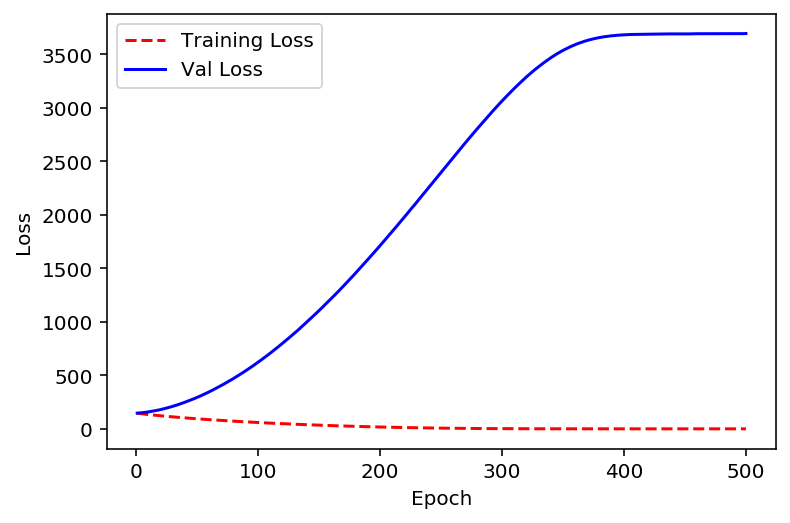

In [102]:
# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Part 2 

In [0]:
%tensorflow_version 2.x

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.initializers import RandomNormal, RandomUniform
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalHinge, MeanSquaredError
from tensorflow.keras import regularizers

In [158]:
dataset = pd.read_csv("heart.csv")

X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [159]:
X.shape

(303, 13)

In [160]:
## TODO START:: Data Pre-Processing

X = preprocessing.normalize(X)
print(X)

## TODO End:: Data Pre-Processing

[[0.19745405 0.00313419 0.00940257 ... 0.         0.         0.00313419]
 [0.10874818 0.00293914 0.00587828 ... 0.         0.         0.00587828]
 [0.1368249  0.         0.00333719 ... 0.00667439 0.         0.00667439]
 ...
 [0.23671899 0.00348116 0.         ... 0.00348116 0.00696232 0.01044348]
 [0.25352009 0.00444772 0.         ... 0.00444772 0.00444772 0.01334316]
 [0.1749685  0.         0.00306962 ... 0.00306962 0.00306962 0.00613925]]


In [155]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
X = poly.fit_transform(X)
print(X.shape)

(303, 560)


In [0]:
# Get Training Data
train_X, temporary_X, train_y, temporary_y = train_test_split(X, y, train_size=0.75, random_state=0)

# Get Validation & Testing Data
val_X, test_X, val_y, test_y = train_test_split(temporary_X, temporary_y, train_size=0.5, random_state=0)

In [0]:
## TODO START:: Model Definition, Writing the Model using Tensorflow.Keras is a must
models = [] 
activations = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid'] 
intializers = ['random_uniform', 'random_normal']

# create different Models
for i in activations: 
  for j in intializers:
    model2 = Sequential()
    model2.add(Dense(1, input_dim= 13, kernel_initializer= j,activation='linear'));
    model2.add(Dense(1, activation= i));
    models.append(model2)
## TODO END:: Model Definition

In [0]:

## TODO Try Different losses & optimizers here
learning_rates= [0.5,0.1,.01,.001]
beta = [0.9,0.999,0.855]
momentums = [0.9,0.95,0.7]
epoch = [50,100,200]
loss_functions = [ 'binary_crossentropy','mse','mean_absolute_error', 'categorical_hinge']

optimizers = [] 
scores = [] 
accuracies = [] 
# generate optimizer type Adam with different alpha
for i in learning_rates:
  for j in beta:
    for k in beta: 
      optimizers.append(Adam(lr = i,  beta_1=j , beta_2 = k))

# generate optimizer type Streaming GD  with differebt alpha and momentum
for i in learning_rates: 
  for j in momentums:
       optimizers.append(SGD(lr = i, momentum =j))

# generate optimizer type RMSprop with different alphav
for i in learning_rates: 
       optimizers.append(RMSprop(lr = i))

#genretate optimizer type Adagrad with different alphav
for i in learning_rates: 
       optimizers.append(Adagrad(lr = i))

for model2 in models:
  for i in loss_functions: 
   for j in optimizers:
      model2.compile(loss=i, metrics=['accuracy'], optimizer=j)
      hist2 = model2.fit(train_X, train_y, verbose=1, validation_data=(val_X, val_y), batch_size=16, epochs=250)
      score2, accuracy2 = model2.evaluate(test_X, test_y, batch_size=16, verbose=0)
      scores.append(score2)
      accuracies.append(accuracy2)

      print("Test fraction correct (NN-Score) = {:.2f}".format(score2))
      print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy2))
      # Get training and test loss histories
      training_loss2 = hist2.history['accuracy']
      val_loss2 = hist2.history['val_accuracy']

      # Create count of the number of epochs
      epoch_count2 = range(1, len(training_loss2) + 1)
      # Visualize loss history
      plt.figure()
      plt.plot(epoch_count2, training_loss2, 'r--')
      plt.plot(epoch_count2, val_loss2, 'b-')
      plt.legend(['Training Accuracy', 'Validation Accuracy'])
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()


In [125]:
print(scores)
print(accuracies)

[6.019436158631978, 6.019436158631978]
[0.6052632, 0.6052632]


Train on 227 samples, validate on 38 samples
Epoch 1/500
227/227 [==============================] - 0s 2ms/sample - loss: 0.9636 - accuracy: 0.4758 - val_loss: 0.9720 - val_accuracy: 0.5263
Epoch 2/500
227/227 [==============================] - 0s 174us/sample - loss: 0.9578 - accuracy: 0.5374 - val_loss: 0.9688 - val_accuracy: 0.5263
Epoch 3/500
227/227 [==============================] - 0s 170us/sample - loss: 0.9555 - accuracy: 0.5374 - val_loss: 0.9647 - val_accuracy: 0.5263
Epoch 4/500
227/227 [==============================] - 0s 167us/sample - loss: 0.9524 - accuracy: 0.5374 - val_loss: 0.9607 - val_accuracy: 0.5263
Epoch 5/500
227/227 [==============================] - 0s 195us/sample - loss: 0.9446 - accuracy: 0.5374 - val_loss: 0.9577 - val_accuracy: 0.5263
Epoch 6/500
227/227 [==============================] - 0s 197us/sample - loss: 0.9405 - accuracy: 0.5374 - val_loss: 0.9551 - val_accuracy: 0.5263
Epoch 7/500
227/227 [==============================] - 0s 167us/sample - lo

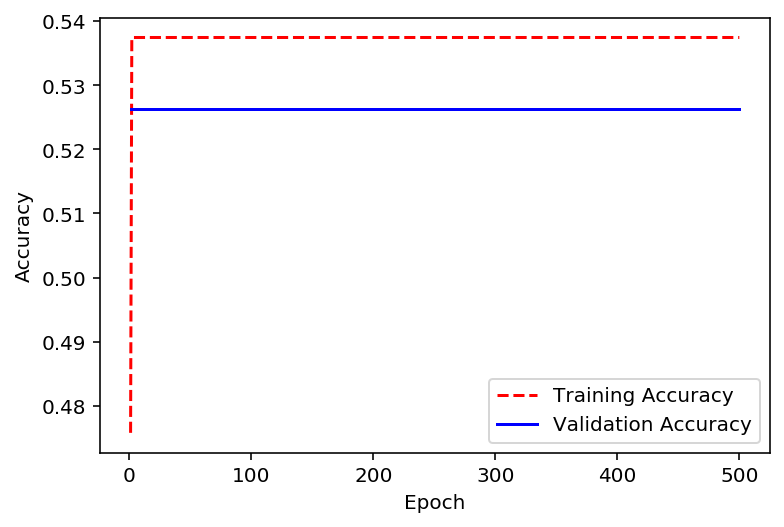

In [166]:
 model2 = Sequential()
model2.add(Dense(1, input_dim= 13, kernel_initializer= 'random_uniform',activation='linear'));
model2.add(Dense(1, activation= 'sigmoid'));
models.append(model2)
model2.compile(loss='categorical_hinge', metrics=['accuracy'], optimizer= Adam(lr = .01,  beta_1=.999 , beta_2 = .9999))
hist2 = model2.fit(train_X, train_y, verbose=1, validation_data=(val_X, val_y), batch_size=16, epochs=500)
score2, accuracy2 = model2.evaluate(test_X, test_y, batch_size=16, verbose=0)
scores.append(score2)
accuracies.append(accuracy2)

print("Test fraction correct (NN-Score) = {:.2f}".format(score2))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy2))
# Get training and test loss histories
training_loss2 = hist2.history['accuracy']
val_loss2 = hist2.history['val_accuracy']

# Create count of the number of epochs
epoch_count2 = range(1, len(training_loss2) + 1)
# Visualize loss history
plt.figure()
plt.plot(epoch_count2, training_loss2, 'r--')
plt.plot(epoch_count2, val_loss2, 'b-')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
